In [1]:
import pandas as pd

In [2]:
data_finance = pd.read_csv('../../nu0002_qa_apps_azure-main/finance_search_playground2.csv')

In [3]:
data_finance

,usuario_id,saldo_actual,ingresos_mensuales,gastos_mensuales,deuda_total,historial_crediticio,dias_ultima_actualizacion,descripcion
0,212184,900000,500000,440000,0,Excelente,7,El usuario con numero de ID 00212184 tiene un ...
1,793475,900000,450000,400000,0,Excelente,5,El usuario con numero de ID 00793475 tiene un ...
2,351786,860000,520000,480000,0,Malo,27,El usuario con numero de ID 00351786 tiene un ...
3,466008,540000,340000,310000,30000,Regular,7,El usuario con numero de ID 00466008 tiene un ...
4,247311,830000,440000,410000,0,Malo,20,El usuario con numero de ID 00247311 tiene un ...
...,...,...,...,...,...,...,...,...
95,304542,1220000,470000,440000,0,Bueno,7,El usuario con numero de ID 00304542 tiene un ...
96,802732,180000,220000,270000,200000,Regular,13,El usuario con numero de ID 00802732 tiene un ...
97,499756,0,170000,120000,0,Bueno,12,El usuario con numero de ID 00499756 tiene un ...
98,688074,720000,390000,340000,0,Regular,5,El usuario con numero de ID 00688074 tiene un ...


In [4]:
import tiktoken

# FUncion para contar el numero de tokens en un texto
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [8]:
def create_document_from_finance_data(usuario_id, deuda_total, historial_crediticio, descripcion):
    document = f"Usuario ID: {usuario_id}\n" \
               f"Deuda Total: {deuda_total}\n" \
               f"Historial Crediticio: {historial_crediticio}\n" \
               f"Descripción: {descripcion}"
    
    return document


In [9]:
# Aplica la función a cada fila del DataFrame de finanzas
data_finance['deuda_document'] = data_finance.apply(
    lambda x: create_document_from_finance_data(
        x['usuario_id'],
        x['deuda_total'],
        x['historial_crediticio'],
        x['descripcion']
    ),
    axis=1
)


In [10]:
data_finance

,usuario_id,saldo_actual,ingresos_mensuales,gastos_mensuales,deuda_total,historial_crediticio,dias_ultima_actualizacion,descripcion,deuda_document
0,212184,900000,500000,440000,0,Excelente,7,El usuario con numero de ID 00212184 tiene un ...,Usuario ID: 212184\nDeuda Total: 0\nHistorial ...
1,793475,900000,450000,400000,0,Excelente,5,El usuario con numero de ID 00793475 tiene un ...,Usuario ID: 793475\nDeuda Total: 0\nHistorial ...
2,351786,860000,520000,480000,0,Malo,27,El usuario con numero de ID 00351786 tiene un ...,Usuario ID: 351786\nDeuda Total: 0\nHistorial ...
3,466008,540000,340000,310000,30000,Regular,7,El usuario con numero de ID 00466008 tiene un ...,Usuario ID: 466008\nDeuda Total: 30000\nHistor...
4,247311,830000,440000,410000,0,Malo,20,El usuario con numero de ID 00247311 tiene un ...,Usuario ID: 247311\nDeuda Total: 0\nHistorial ...
...,...,...,...,...,...,...,...,...,...
95,304542,1220000,470000,440000,0,Bueno,7,El usuario con numero de ID 00304542 tiene un ...,Usuario ID: 304542\nDeuda Total: 0\nHistorial ...
96,802732,180000,220000,270000,200000,Regular,13,El usuario con numero de ID 00802732 tiene un ...,Usuario ID: 802732\nDeuda Total: 200000\nHisto...
97,499756,0,170000,120000,0,Bueno,12,El usuario con numero de ID 00499756 tiene un ...,Usuario ID: 499756\nDeuda Total: 0\nHistorial ...
98,688074,720000,390000,340000,0,Regular,5,El usuario con numero de ID 00688074 tiene un ...,Usuario ID: 688074\nDeuda Total: 0\nHistorial ...


In [11]:
# Aplica la función para contar tokens a cada fila del DataFrame de finanzas
data_finance['deuda_document_token_count'] = data_finance.apply(
    lambda x: num_tokens_from_string(x['deuda_document'], 'cl100k_base'), 
   axis=1
)


/home/carolina/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


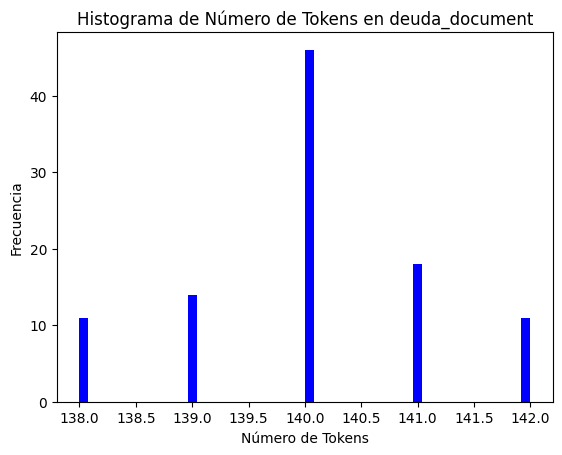

In [12]:
# Importa la biblioteca necesaria para el histograma
import matplotlib.pyplot as plt

# Crea el histograma para 'deuda_document_token_count' en el DataFrame data_finance
plt.hist(data_finance['deuda_document_token_count'], bins=50, color='blue')
plt.xlabel('Número de Tokens')
plt.ylabel('Frecuencia')
plt.title('Histograma de Número de Tokens en deuda_document')
plt.show()


In [16]:
data_finance_json = data_finance[['usuario_id','saldo_actual','ingresos_mensuales','gastos_mensuales','deuda_total','historial_crediticio','dias_ultima_actualizacion','descripcion','deuda_document']]
data_finance_json,

(    usuario_id  saldo_actual  ingresos_mensuales  gastos_mensuales  \
 0       212184        900000              500000            440000   
 1       793475        900000              450000            400000   
 2       351786        860000              520000            480000   
 3       466008        540000              340000            310000   
 4       247311        830000              440000            410000   
 ..         ...           ...                 ...               ...   
 95      304542       1220000              470000            440000   
 96      802732        180000              220000            270000   
 97      499756             0              170000            120000   
 98      688074        720000              390000            340000   
 99      769279        580000              460000            380000   
 
     deuda_total historial_crediticio  dias_ultima_actualizacion  \
 0             0            Excelente                          7   
 1        

In [17]:
from json import loads, dumps

json_data = data_finance_json.to_json(orient="records")
parsed = loads(json_data)

In [20]:
parsed

[{'usuario_id': 212184,
  'saldo_actual': 900000,
  'ingresos_mensuales': 500000,
  'gastos_mensuales': 440000,
  'deuda_total': 0,
  'historial_crediticio': 'Excelente',
  'dias_ultima_actualizacion': 7,
  'descripcion': 'El usuario con numero de ID 00212184 tiene un saldo actual de 900000$ e ingresos mesuales de 500000$. Contra eso, se registran gastos mensuales de 440000$ lo cual lleva a un neto de 60000$, la deuda acumulada es 0$. El usuario tiene una clasificacion de historial crediticio Excelente. En terminos de actividad, se registra la ultima actualizacion el dia 2023-11-21, indica 7 dias de inactividad.',
  'deuda_document': 'Usuario ID: 212184\nDeuda Total: 0\nHistorial Crediticio: Excelente\nDescripción: El usuario con numero de ID 00212184 tiene un saldo actual de 900000$ e ingresos mesuales de 500000$. Contra eso, se registran gastos mensuales de 440000$ lo cual lleva a un neto de 60000$, la deuda acumulada es 0$. El usuario tiene una clasificacion de historial crediticio 

In [21]:
import pandas as pd

# Suponiendo que data_finance es tu DataFrame
data_finance_json = data_finance[['usuario_id', 'saldo_actual', 'ingresos_mensuales', 'gastos_mensuales', 'deuda_total', 'historial_crediticio', 'dias_ultima_actualizacion', 'descripcion', 'deuda_document''usuario_id', 'saldo_actual', 'ingresos_mensuales', 'gastos_mensuales', 'deuda_total', 'historial_crediticio', 'dias_ultima_actualizacion', 'descripcion', 'deuda_document']]

# Convertir DataFrame a formato JSON
json_data = data_finance_json.to_json(orient='records')

# Guardar JSON en un archivo en la ruta /home/carolina
ruta_guardado = '/home/carolina/data_finance.json'
with open(ruta_guardado, 'w') as json_file:
    json_file.write(json_data)


In [23]:
from json import loads, dumps
import pandas as pd  # Asumiendo que estás utilizando pandas para `to_json`

# Supongamos que ya tienes `data_finance_json` definido

# Convierte a formato JSON
json_data = data_finance_json.to_json(orient="records")

# Carga el JSON para asegurarte de que es válido
parsed = loads(json_data)

# Especifica la ruta del archivo en /home (asegúrate de tener permisos)
file_path = '/home/carolina/data_finance.json'

# Guarda el JSON en un archivo en la ruta especificada
with open(file_path, 'w') as f:
    f.write(dumps(parsed, indent=4))

print(f"Los datos se han guardado exitosamente en {file_path}")


Los datos se han guardado exitosamente en /home/carolina/data_finance.json
